# Método Cuasi-Newton

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import minimize

In [14]:
#Primero definimos nuestra funcion f.

In [15]:
def f(xy):
    x, y = xy
    return np.exp(x**2)*y**2 + 2*np.exp(y**2)*x**2 + 4*x*y + 2*x**2 + 4*x - 2*y


In [16]:
#Calculamos las derivadas de nuestra función.

In [17]:
def df(xy):
    x, y = xy
    df_dx = 2*x*np.exp(x**2)*y**2 + 4*np.exp(y**2)*x + 4*y + 4*x + 4
    df_dy = 2*y*np.exp(x**2)*x**2 + 4*np.exp(y**2)*y + 4*x - 2
    return np.array([df_dx, df_dy])

In [18]:
#Definimos nuestro punto semilla.

In [19]:
x0 = np.array([-1.8, 1.3])

In [20]:
#Aplicamos nuestro método de CUASI-NEWTON.

In [21]:
res = minimize(f, x0, method='BFGS', jac=df, tol=0.00001)
print(res)

      fun: -2.937375443432028
 hess_inv: array([[ 0.0408491 , -0.00198865],
       [-0.00198865,  0.04768955]])
      jac: array([-0.43881083,  2.6687126 ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 64
      nit: 6
     njev: 54
   status: 2
  success: False
        x: array([-0.56844158,  0.80866279])


In [22]:
#Ahora para graficar.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_26208\176315060.py:3: RuntimeWarning: overflow encountered in exp
  return np.exp(x**2)*y**2 + 2*np.exp(y**2)*x**2 + 4*x*y + 2*x**2 + 4*x - 2*y


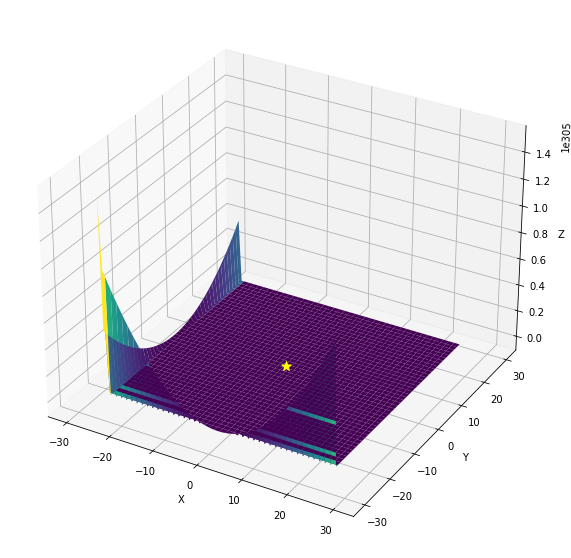

In [37]:
x_vals = np.linspace(-30, 30, 100)
y_vals = np.linspace(-30, 30, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = f([X, Y])

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.scatter(res.x[0], res.x[1], f(res.x), c='yellow', s=100, marker='*')

plt.show()
